<a href="https://colab.research.google.com/github/NDsasuke/Classification-Regression-Clustering/blob/main/Regression/Energy_Consumption_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

Preprocessing

In [13]:
# Load the dataset (you need to download the data and adjust the path accordingly)
data = pd.read_csv('household_power_consumption.txt', sep=';', 
                   parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                   low_memory=False, na_values=['nan','?'], index_col='dt')

# Handle missing values
data.fillna(data.mean(), inplace=True)

# Define features and target variable
X = data.drop('Global_active_power', axis=1)
y = data['Global_active_power']

# Split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Building

In [14]:

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions using the testing set
predictions = model.predict(X_test)

Analyzing

Mean Squared Error: 0.001717375038134708


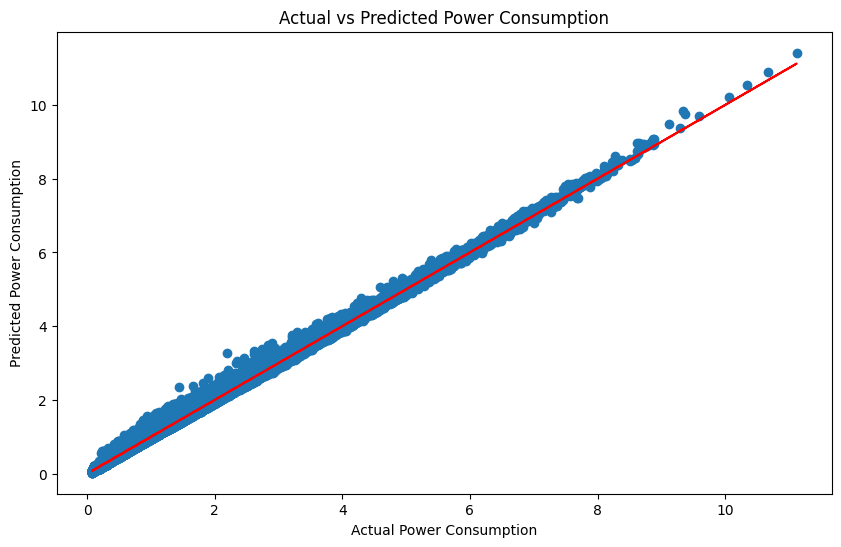

In [15]:
# Print the mean squared error of the model
print(f"Mean Squared Error: {mean_squared_error(y_test, predictions)}")

# Plotting Actual vs Predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, color='red')
plt.xlabel("Actual Power Consumption")
plt.ylabel("Predicted Power Consumption")
plt.title("Actual vs Predicted Power Consumption")
plt.show()

In [16]:
# Print the first few rows of the dataset
print(data.head())

# Print the summary statistics of the dataset
print(data.describe())


                     Global_active_power  Global_reactive_power  Voltage  \
dt                                                                         
2006-12-16 17:24:00                4.216                  0.418   234.84   
2006-12-16 17:25:00                5.360                  0.436   233.63   
2006-12-16 17:26:00                5.374                  0.498   233.29   
2006-12-16 17:27:00                5.388                  0.502   233.74   
2006-12-16 17:28:00                3.666                  0.528   235.68   

                     Global_intensity  Sub_metering_1  Sub_metering_2  \
dt                                                                      
2006-12-16 17:24:00              18.4             0.0             1.0   
2006-12-16 17:25:00              23.0             0.0             1.0   
2006-12-16 17:26:00              23.0             0.0             2.0   
2006-12-16 17:27:00              23.0             0.0             1.0   
2006-12-16 17:28:00          

Plot the distribution of the target variable:

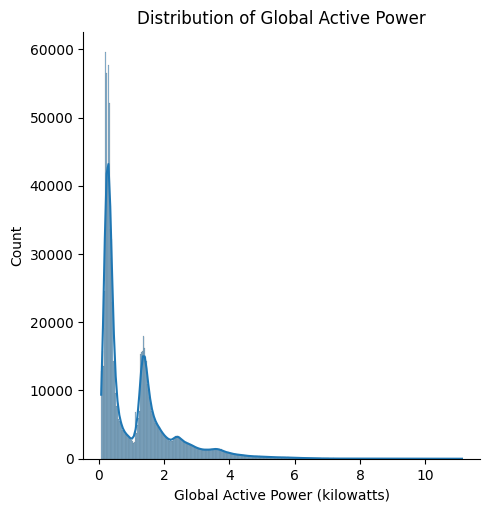

In [17]:
import seaborn as sns

# Plot the distribution of the target variable 'Global_active_power'
sns.displot(data['Global_active_power'], kde=True)
plt.title('Distribution of Global Active Power')
plt.xlabel('Global Active Power (kilowatts)')
plt.ylabel('Count')
plt.show()


Visualize the correlation between features:

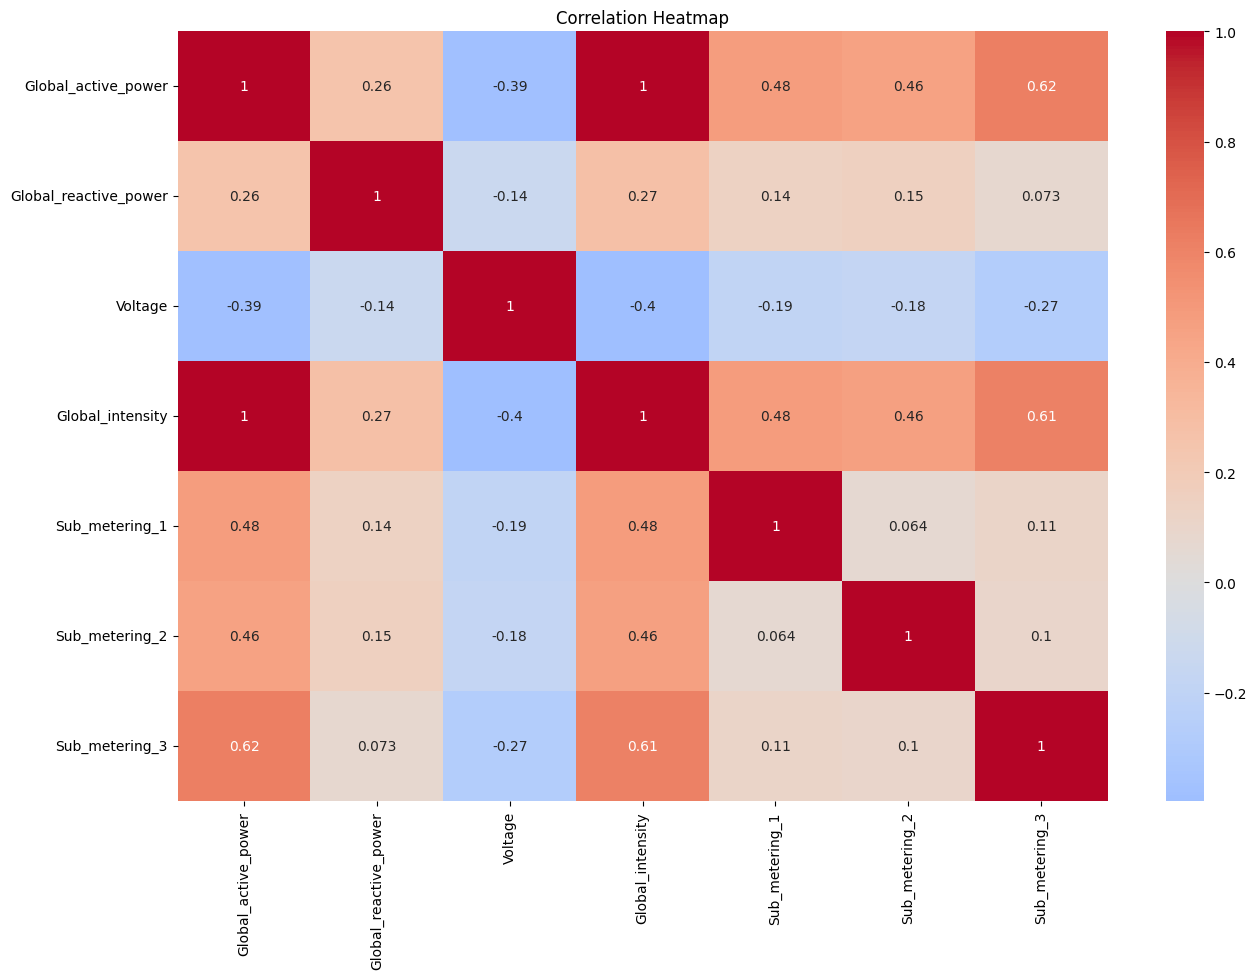

In [18]:
# Plot a correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")
plt.show()


Compare actual and predicted values:

In [19]:
# Compare actual and predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
print(df.head(10))


                       Actual  Predicted
dt                                      
2008-08-29 15:34:00  0.182000   0.164280
2007-10-31 18:20:00  1.412000   1.395069
2009-03-07 11:56:00  0.492000   0.485285
2007-04-28 02:31:00  1.128828   1.128848
2008-02-09 22:15:00  1.666000   1.594173
2008-08-04 19:35:00  3.684000   3.674691
2007-12-12 19:22:00  2.692000   2.665206
2008-07-30 04:46:00  0.346000   0.415736
2007-06-30 22:08:00  1.142000   1.119358
2007-07-31 23:37:00  0.282000   0.275985


Visualize residuals:

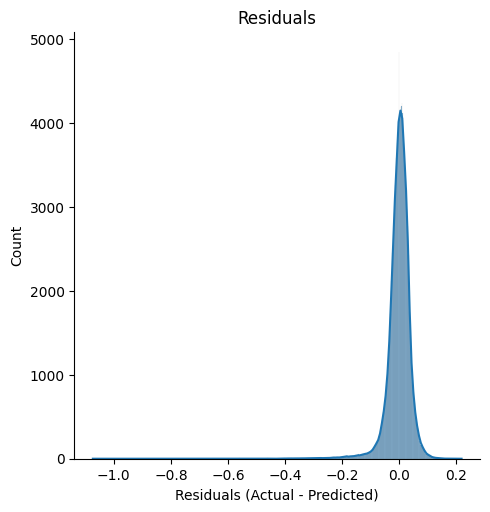

In [20]:
# Calculate residuals
residuals = y_test - predictions

# Plot residuals
sns.displot(residuals, kde=True)
plt.title('Residuals')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Count')
plt.show()


Evaluate model with other metrics:

In [21]:
# Import additional metrics
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate and print additional metrics
print(f"Mean Absolute Error: {mean_absolute_error(y_test, predictions)}")
print(f"R^2 Score: {r2_score(y_test, predictions)}")


Mean Absolute Error: 0.026585545163917222
R^2 Score: 0.9986526772585762
